In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [2]:
df=pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Information

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

# Data Description

In [5]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.head(8)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


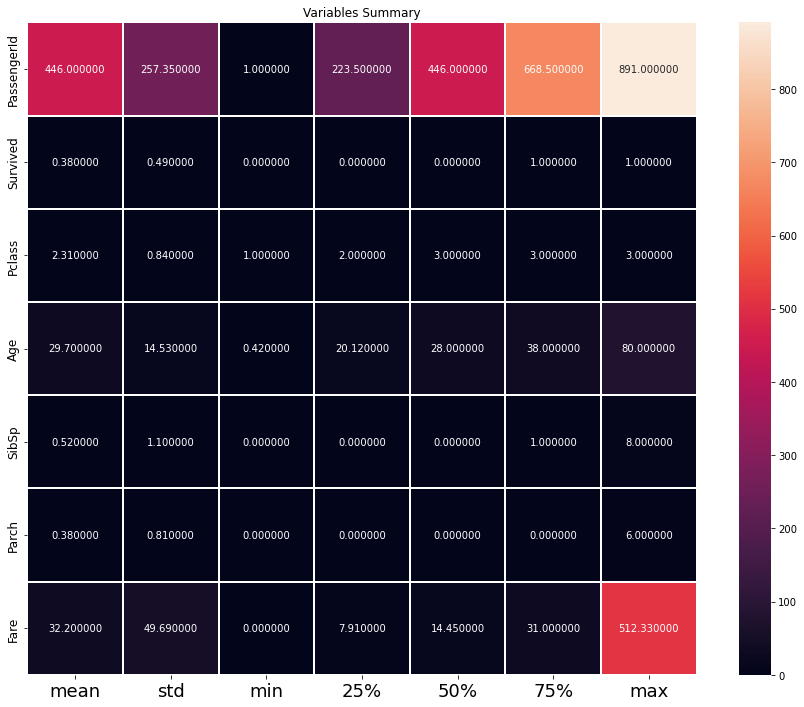

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

# Checking The Null Values

In [8]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.drop('Cabin',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)


In [10]:
for col in df.columns:
    print(col,len(df[col].unique()))


PassengerId 891
Survived 2
Pclass 3
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Embarked 4


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [12]:
df.describe(include='all')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


In [13]:
df.describe(include="O")


,Sex,Ticket,Embarked
count,891,891,889
unique,2,681,3
top,male,347082,S
freq,577,7,644


In [14]:
num_cols = df._get_numeric_data().columns
obj_cols = df.select_dtypes('object').columns


In [15]:
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [16]:
obj_cols

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

# Data Visulaization

In [17]:
people_survived = df[df['Survived']==1].shape[0]
people_died = df[df['Survived']==0].shape[0]
print(f'No. People survived titanic {people_survived}')
print(f'No. People died on titanic {people_died}')


No. People survived titanic 342
No. People died on titanic 549


<AxesSubplot:xlabel='Sex', ylabel='count'>

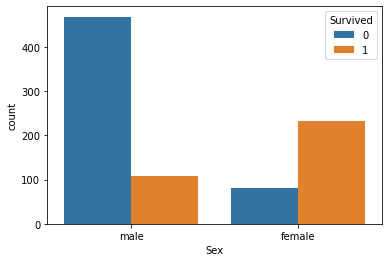

In [18]:
sns.countplot(x="Sex", hue='Survived' ,data=df)


<AxesSubplot:xlabel='Pclass', ylabel='count'>

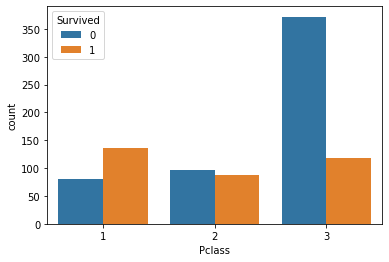

In [19]:
sns.countplot(x="Pclass", hue='Survived' ,data=df)


<AxesSubplot:xlabel='Embarked', ylabel='count'>

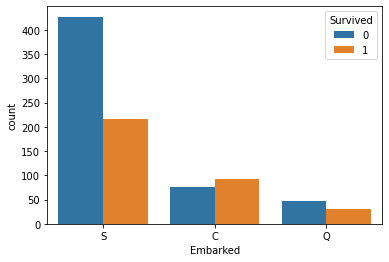

In [20]:
sns.countplot(x="Embarked", hue="Survived", data=df)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

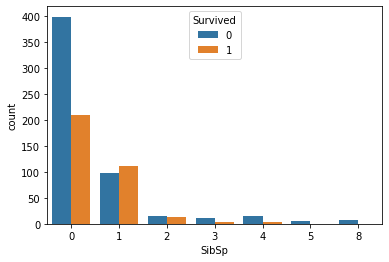

In [21]:
sns.countplot(x="SibSp", hue='Survived', data=df)


<AxesSubplot:xlabel='Embarked', ylabel='count'>

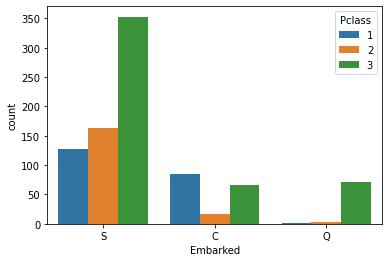

In [22]:
sns.countplot(x='Embarked',hue='Pclass',data=df)


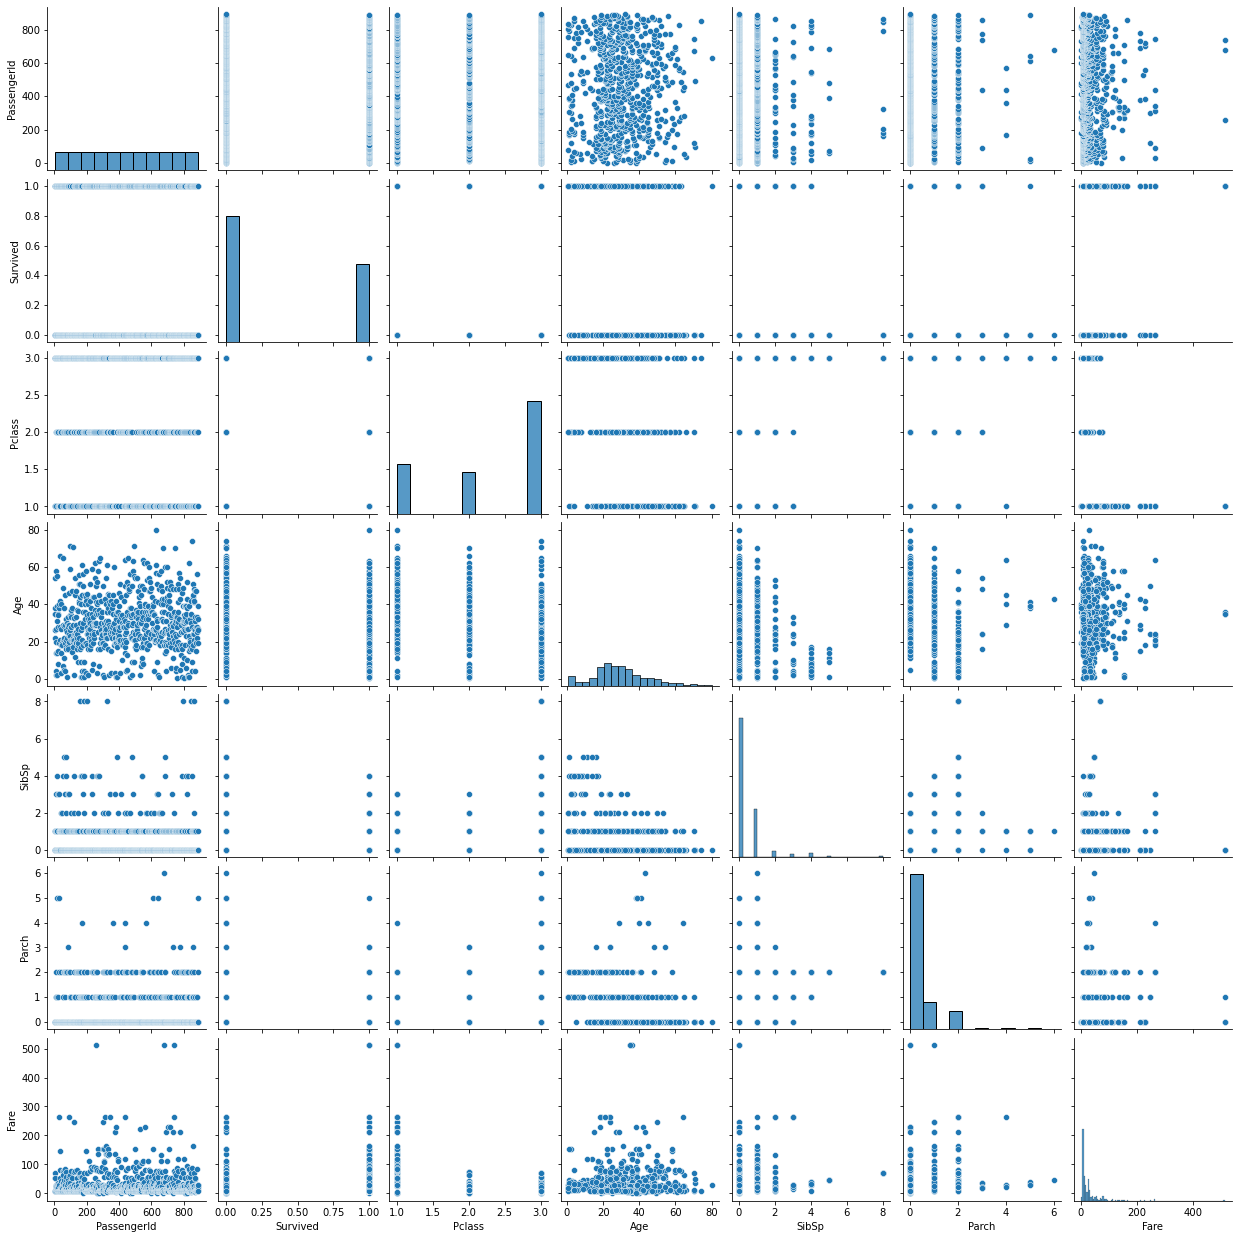

In [23]:
sns.pairplot(df)


# Data Correlation

In [24]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

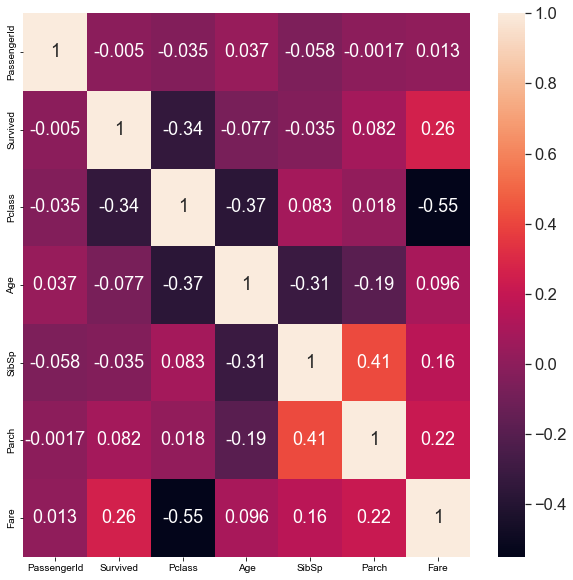

In [25]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.set(font_scale=1.5) 
sns.heatmap(df.corr(), annot=True,ax=ax)


# Data Cleaning


In [26]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [27]:
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [28]:
df['Embarked'].dtype


dtype('O')

# mode() returns an array


In [30]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


<AxesSubplot:ylabel='Frequency'>

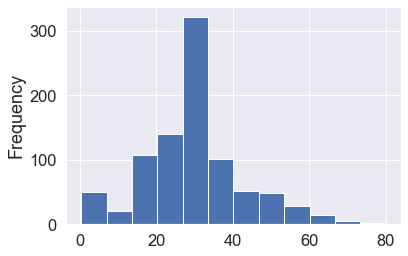

In [31]:
df['Age'].plot.hist(bins=12, alpha=1)


C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

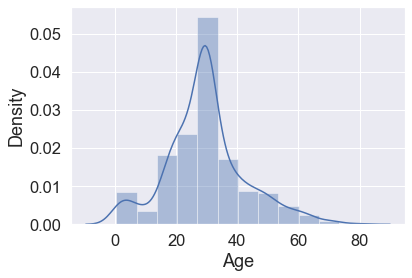

In [32]:
sns.distplot(df['Age'],bins=12)


<AxesSubplot:ylabel='Frequency'>

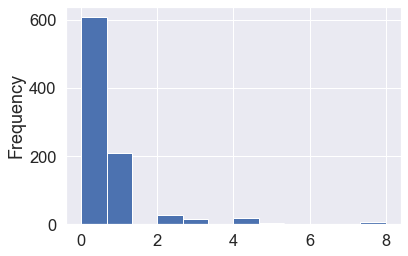

In [33]:
df['SibSp'].plot.hist(bins=12, alpha=1)


<AxesSubplot:ylabel='Frequency'>

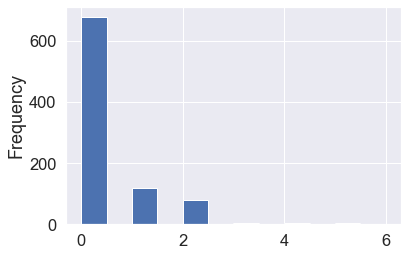

In [34]:
df['Parch'].plot.hist(bins=12, alpha=1)


In [35]:
print(df.Age.mean())
print(df.Age.median())
print(df.Age.mode()[0])


29.699117647058763
29.69911764705882
29.69911764705882


In [36]:
print('Feature \t Mean \t Median \t Mode')
for i in num_cols:
    print(i,end='\t')
    print(df[i].mean(),end='\t')
    print(df[i].median(),end='\t')
    print(df[i].mode()[0])


Feature 	 Mean 	 Median 	 Mode
PassengerId	446.0	446.0	1
Survived	0.3838383838383838	0.0	0
Pclass	2.308641975308642	3.0	3
Age	29.699117647058763	29.69911764705882	29.69911764705882
SibSp	0.5230078563411896	0.0	0
Parch	0.38159371492704824	0.0	0
Fare	32.2042079685746	14.4542	8.05


In [37]:
df['zscore_age']=((df.Age-df.Age.mean())/df.Age.std())


In [38]:
df[(df['zscore_age']>3)|(df['zscore_age']<-3)]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,zscore_age
96,97,0,1,male,71.0,0,0,PC 17754,34.6542,C,3.176499
116,117,0,3,male,70.5,0,0,370369,7.7500,Q,3.138043
493,494,0,1,male,71.0,0,0,PC 17609,49.5042,C,3.176499
630,631,1,1,male,80.0,0,0,27042,30.0000,S,3.868699
672,673,0,2,male,70.0,0,0,C.A. 24580,10.5000,S,3.099587
745,746,0,1,male,70.0,1,1,WE/P 5735,71.0000,S,3.099587
851,852,0,3,male,74.0,0,0,347060,7.7750,S,3.407232


In [39]:
df_clean = df.drop(df[(df.zscore_age>3)|(df.zscore_age<-3)].index,axis=0)


{'whiskers': [<matplotlib.lines.Line2D at 0x19dcff1b400>,
 'caps': [<matplotlib.lines.Line2D at 0x19dcff1bb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x19dcff1b070>],
 'medians': [<matplotlib.lines.Line2D at 0x19dcff26280>],
 'fliers': [<matplotlib.lines.Line2D at 0x19dcff26610>],
 'means': []}

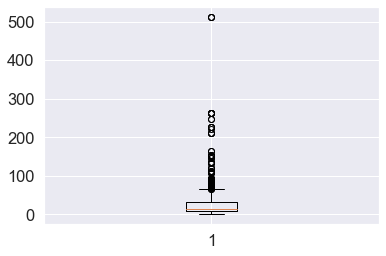

In [40]:
plt.boxplot(df_clean.Fare)


In [41]:
upper_threshold = df_clean['Fare'].quantile(0.99)
lower_threshold = df_clean['Fare'].quantile(0.05)
print(upper_threshold,lower_threshold)


250.0460139999994 7.225


In [42]:
df_clean[df_clean['Fare']>upper_threshold].shape[0]


9

In [43]:
df_clean[df_clean['Fare']<lower_threshold].shape[0]


43

<AxesSubplot:xlabel='Survived', ylabel='count'>

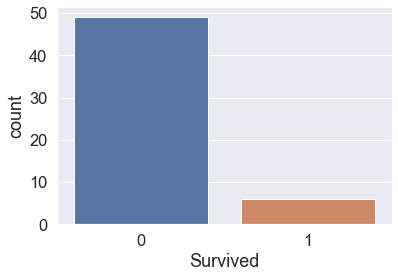

In [44]:
sns.countplot(x='Survived',data=df_clean[df_clean['Fare']<=lower_threshold])


<AxesSubplot:xlabel='Survived', ylabel='count'>

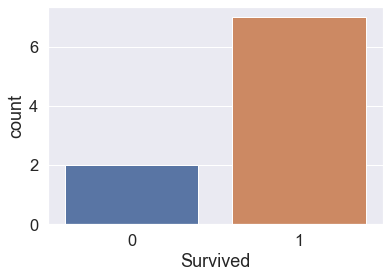

In [45]:
sns.countplot(x='Survived',data=df_clean[df_clean['Fare']>=upper_threshold])


In [46]:
df_clean = df_clean[(df_clean['Fare']<=upper_threshold)&(df_clean['Fare']>=lower_threshold)]


In [47]:
df_clean.shape[0]


832

In [48]:
def binary_encoder(data):
    if data == 'female':
        return 0
    else :
        return 1


In [49]:
df_clean['Sex']=df_clean['Sex'].apply(binary_encoder)


In [50]:
df_clean['Sex']


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 832, dtype: int64

In [51]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df_clean['Ticket'] = encoder.fit_transform(df_clean['Ticket'])


In [52]:
df_clean['Ticket']


0      495
1      564
2      622
3       45
4      446
      ... 
886     95
887     12
888    628
889      8
890    440
Name: Ticket, Length: 832, dtype: int32

In [53]:
pass_id = df_clean['PassengerId']
X = df_clean[['Age','Fare','Sex','Ticket','Embarked','SibSp','Parch','Pclass']]
y = df_clean[['Survived']]


In [54]:
dummies = pd.get_dummies(X['Embarked'])
dummies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [55]:
X.drop('Embarked',axis=1,inplace=True)
cols = dummies.columns
X[cols]=dummies
X


C:\Users\pooja\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\pooja\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Age,Fare,Sex,Ticket,SibSp,Parch,Pclass,C,Q,S
0,22.000000,7.2500,1,495,1,0,3,0,0,1
1,38.000000,71.2833,0,564,1,0,1,1,0,0
2,26.000000,7.9250,0,622,0,0,3,0,0,1
3,35.000000,53.1000,0,45,1,0,1,0,0,1
4,35.000000,8.0500,1,446,0,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,1,95,0,0,2,0,0,1
887,19.000000,30.0000,0,12,0,0,1,0,0,1
888,29.699118,23.4500,0,628,1,2,3,0,0,1
889,26.000000,30.0000,1,8,0,0,1,1,0,0


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2048,stratify=y)


In [57]:
from sklearn.preprocessing import MinMaxScaler


In [58]:
X_train.shape[0] == y_train.shape[0]


True

In [59]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


<AxesSubplot:xlabel='Survived', ylabel='count'>

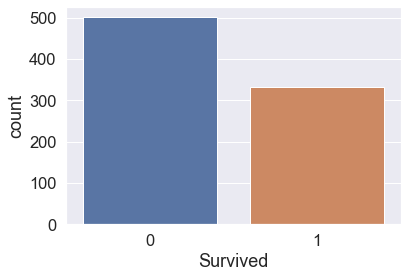

In [60]:
sns.countplot(x='Survived',data=y)


In [61]:
def apply_model(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)   
    print('Unscaled data result')
    print(accuracy_score(y_test,predictions))
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train.values)
    X_test  =  scaler.fit_transform(X_test.values)
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)   
    print('Scaled data result')
    print(accuracy_score(y_test,predictions))


In [62]:
from sklearn.linear_model import LogisticRegression


In [63]:
clf = LogisticRegression(max_iter=150)
apply_model(clf,X_train,X_test,y_train,y_test)


Unscaled data result
0.7724550898203593
Scaled data result
0.7904191616766467


C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [64]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5)
apply_model(tree_clf,X_train,X_test,y_train,y_test)


Unscaled data result
0.7964071856287425
Scaled data result
0.8023952095808383


In [65]:
# from sklearn import tree
# fig = plt.figure(figsize=(100,150))
# _ = tree.plot_tree(tree_clf, 
#                    feature_names=X.columns,  
#                    class_names='Survived',
#                    filled=True)


In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)

apply_model(rf_clf,X_train,X_test,y_train,y_test)


C:\Users\pooja\AppData\Local\Temp/ipykernel_19076/3628777898.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
C:\Users\pooja\AppData\Local\Temp/ipykernel_19076/3628777898.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Unscaled data result
0.8203592814371258
Scaled data result
0.8323353293413174


In [69]:
test = pd.read_csv("titanictest.csv")


In [70]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [72]:
pass_id = test['PassengerId']
X_test = test[['Age','Fare','Sex','Ticket','Embarked','SibSp','Parch','Pclass']]
X_test['Ticket'] =encoder.fit_transform(X_test['Ticket'])


C:\Users\pooja\AppData\Local\Temp/ipykernel_19076/783473143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Ticket'] =encoder.fit_transform(X_test['Ticket'])


In [73]:
X_test.Fare.fillna(X.Fare.mean(),inplace=True)


C:\Users\pooja\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [74]:
X_test.Age.fillna(X.Age.mean(),inplace=True)


In [75]:
X_test.isnull().sum()


Age         0
Fare        0
Sex         0
Ticket      0
Embarked    0
SibSp       0
Parch       0
Pclass      0
dtype: int64

In [85]:
X_test['Sex'] = X_test['Sex'].apply(binary_encoder)
X_test.head()


C:\Users\pooja\AppData\Local\Temp/ipykernel_19076/4213646427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = X_test['Sex'].apply(binary_encoder)


,Age,Fare,Sex,Ticket,Embarked,SibSp,Parch,Pclass
0,34.5,7.8292,1,152,Q,0,0,3
1,47.0,7.0000,1,221,S,1,0,3
2,62.0,9.6875,1,73,Q,0,0,2
3,27.0,8.6625,1,147,S,0,0,3
4,22.0,12.2875,1,138,S,1,1,3


In [86]:
dummies = pd.get_dummies(df['Embarked'])
X_test.drop('Embarked',axis=1,inplace=True)
X_test[dummies.columns]=dummies

X_test.fillna(0,inplace=True)


C:\Users\pooja\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\pooja\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\pooja\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [87]:
X_test

,Age,Fare,Sex,Ticket,SibSp,Parch,Pclass,C,Q,S
0,34.500000,7.8292,1,152,0,0,3,0,0,1
1,47.000000,7.0000,1,221,1,0,3,1,0,0
2,62.000000,9.6875,1,73,0,0,2,0,0,1
3,27.000000,8.6625,1,147,0,0,3,0,0,1
4,22.000000,12.2875,1,138,1,1,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,29.269499,8.0500,1,267,0,0,3,0,0,1
414,39.000000,108.9000,1,324,0,0,1,0,0,1
415,38.500000,7.2500,1,346,0,0,3,0,0,1
416,29.269499,8.0500,1,220,0,0,3,0,0,1


In [88]:
prediction = rf_clf.predict(X_test)

In [89]:
len(prediction)==len(pass_id)


True

In [90]:
results = pd.DataFrame()
results['PassengerId']=pass_id.values
results['Survived']=prediction
results.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [91]:
results.to_csv('results.csv',index=None)
